In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
import math as m


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000

c:\python27\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\python27\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\python27\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\python27\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\python27\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  f

In [2]:
def corr_salePrice(attribute):
    data.groupby(attribute)['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', figsize = (20, 10))

In [3]:
data = pd.read_csv("train.csv")
target = data['SalePrice']
data.drop(['Id'], axis = 1, inplace = True)

In [4]:
data.dtypes
data.shape

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


(1460, 80)

### Drop columns that are missing at least than 25% of their values

In [5]:
data.isna().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageYrBlt      0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
RoofMatl         0.000000
Exterior1st      0.000000
RoofStyle        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
YearBuilt        0.000000
ExterCond        0.000000
Foundation       0.000000
YearRemodAdd     0.000000
SalePrice        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities   

In [6]:
# data.isna().mean().sort_values(ascending=False)
cols = [col for col in data.isna().mean() >= .25]
data.columns[cols]
data.drop(columns = data.columns[cols], axis = 1, inplace = True)

data.shape


Index([u'Alley', u'FireplaceQu', u'PoolQC', u'Fence', u'MiscFeature'], dtype='object')

(1460, 75)

### Constant variables

In [7]:
# selector = VarianceThreshold(threshold=0.05)
# selector.fit(data)
# data.columns[selector.get_support()]

# cols = [col for col in data.isnull().mean() > 0]
# for col in data.columns[cols]:
for col in data.columns:
    
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        if data[col].std() == 0:
            col
            data[col].std()
    else:
        if len(data[col].unique()) == 1:
            col
            data[col].unique()

### Quasi constant variables

In [8]:
dfLength = float(len(data))
quasConst = []
for col in data.columns:
    dominating_val_pct = (data[col].value_counts()/ dfLength).sort_values(ascending=False).values[0]
    if dominating_val_pct > .95:
        col
        quasConst.append(col)
        
data.drop(inplace = True, columns = quasConst, axis = 1)
data.shape

'Street'

'Utilities'

'Condition2'

'RoofMatl'

'Heating'

'LowQualFinSF'

'KitchenAbvGr'

'3SsnPorch'

'PoolArea'

'MiscVal'

(1460, 65)

In [9]:
data.LotFrontage = data.groupby(['PavedDrive', 'BldgType', 'Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.mean()))
# the above leaves some more null values
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)

### Imputing categorical data

In [10]:
data['GarageQual'].fillna(data['KitchenQual'], inplace = True)

In [11]:


# data[data['GarageCond'].isnull()]
# data.groupby(['OverallCond'])['GarageCond'].value_counts().sort_values(ascending=False)
nullCols = []
colMasks = [col for col in data.isnull().mean() > 0]
for col in colMasks:
    nullCols.append(col)
cols = data.columns[nullCols]
for col in cols:
    data[col].fillna(data[col].mode()[0], inplace = True)




### Correlation

In [12]:
data.corr().abs().unstack()[(data.corr().abs().unstack() > .8) & (data.corr().abs().unstack() < 1)]
highCorrVars = ['GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea']
data.drop(inplace = True, columns = highCorrVars, axis = 1)
data.shape

TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
dtype: float64

(1460, 61)

In [13]:
data.corr().abs().unstack()['LotFrontage']

MSSubClass       0.402373
LotFrontage      1.000000
LotArea          0.337904
OverallQual      0.227436
OverallCond      0.037687
YearBuilt        0.113525
YearRemodAdd     0.073844
MasVnrArea       0.176860
BsmtFinSF1       0.223633
BsmtFinSF2       0.049971
BsmtUnfSF        0.122486
1stFlrSF         0.429881
2ndFlrSF         0.084762
GrLivArea        0.389481
BsmtFullBath     0.096236
BsmtHalfBath     0.009346
FullBath         0.189723
HalfBath         0.066152
BedroomAbvGr     0.267617
Fireplaces       0.255323
GarageCars       0.270558
WoodDeckSF       0.094115
OpenPorchSF      0.144117
EnclosedPorch    0.005709
ScreenPorch      0.039641
MoSold           0.014807
YrSold           0.003339
SalePrice        0.347110
dtype: float64

### Categorical Encoding

In [14]:
data['YearBuilt'].describe()
data['YearBuilt'].unique()
data['YearBuilt'] = data['YearBuilt'].round(-1)
data['YearBuilt'].describe()
data['YearBuilt'].unique()

data['YrSold'] = data['YrSold'].round(-1)





count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

count    1460.000000
mean     1971.315068
std        30.270373
min      1870.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

array([2000, 1980, 1920, 1990, 1970, 1930, 1940, 1960, 2010, 1950, 1910,
       1880, 1890, 1900, 1870], dtype=int64)

In [15]:
data['MoSold'].unique()
seasonMap = { 12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall',11:'Fall'}

data['MoSold'] = data['MoSold'].map(seasonMap)
data['MoSold'].unique()
data['MoSold'].describe()


array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

array(['Winter', 'Spring', 'Fall', 'Summer'], dtype=object)

count       1460
unique         4
top       Summer
freq         609
Name: MoSold, dtype: object

In [16]:

data = data.astype({"MSSubClass": object, "YearBuilt": object, "YearRemodAdd": object, "MoSold": object, "YrSold": object, "OverallQual": object, "OverallCond": object})
data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64


### Bucket Neighborhoods into rich, average, cheap, poor

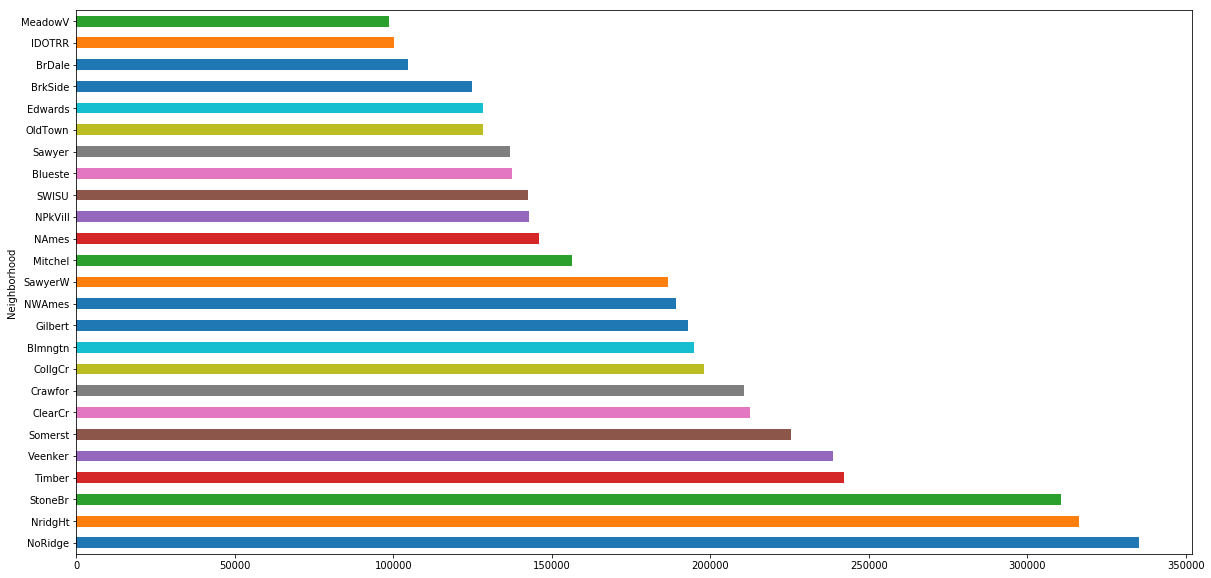

In [17]:
# data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', figsize = (20, 10))
corr_salePrice(['Neighborhood'])

In [18]:
data['Neighborhood'].value_counts().sort_index(ascending=False)
neighborhoodMap = {}
for expN in ['NoRidge','NridgHt','StoneBr']:
    neighborhoodMap[expN] = 'ExpensiveN'
for avgN in ['Timber','Veenker','Somerst','ClearCr','Crawfor','CollgCr','Blmngtn','Gilbert','NWAmes','SawyerW']:
    neighborhoodMap[avgN] = 'AverageN'
for cheapN in ['Mitchel','NAmes','NPkVill','SWISU','Blueste','Sawyer','OldTown','Edwards','BrkSide']:
    neighborhoodMap[cheapN] = 'CheapN'
for poorN in ['BrDale','IDOTRR','MeadowV']:
    neighborhoodMap[poorN] = 'PoorN'
data['Neighborhood'] = data['Neighborhood'].map(neighborhoodMap)
data['Neighborhood'].value_counts().sort_index(ascending=False)


Veenker     11
Timber      38
StoneBr     25
Somerst     86
SawyerW     59
Sawyer      74
SWISU       25
OldTown    113
NridgHt     77
NoRidge     41
NWAmes      73
NPkVill      9
NAmes      225
Mitchel     49
MeadowV     17
IDOTRR      37
Gilbert     79
Edwards    100
Crawfor     51
CollgCr    150
ClearCr     28
BrkSide     58
BrDale      16
Blueste      2
Blmngtn     17
Name: Neighborhood, dtype: int64

PoorN          70
ExpensiveN    143
CheapN        655
AverageN      592
Name: Neighborhood, dtype: int64

### Bucket conditions into Normal, near railroad and other

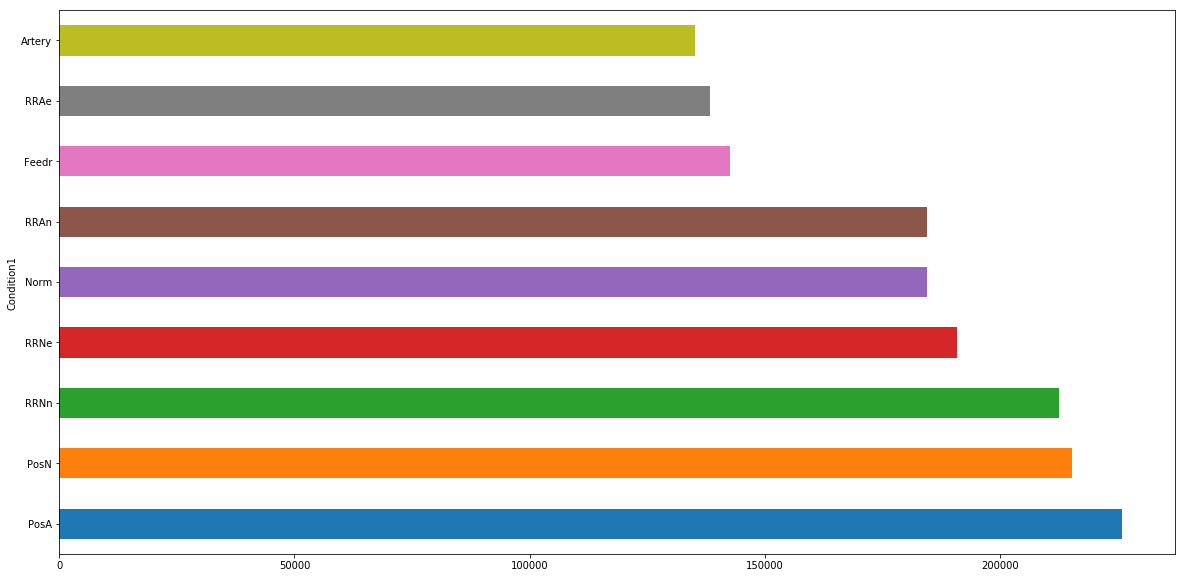

In [19]:
corr_salePrice(['Condition1'])

In [20]:
data['Condition1'].value_counts().sort_index(ascending=False)
conditionMap = {}
for rrn in ['RRNn','RRNe','RRAn', 'RRAe']:
    conditionMap[rrn] = 'railroad'
for norm in ['Norm']:
    conditionMap[norm] = 'normal'
for other in ['PosN','PosA','Feedr', 'Artery']:
    conditionMap[other] = 'other'
data['Condition1'] = data['Condition1'].map(conditionMap)
data['Condition1'].value_counts().sort_index(ascending=False)

RRNn         5
RRNe         2
RRAn        26
RRAe        11
PosN        19
PosA         8
Norm      1260
Feedr       81
Artery      48
Name: Condition1, dtype: int64

railroad      44
other        156
normal      1260
Name: Condition1, dtype: int64

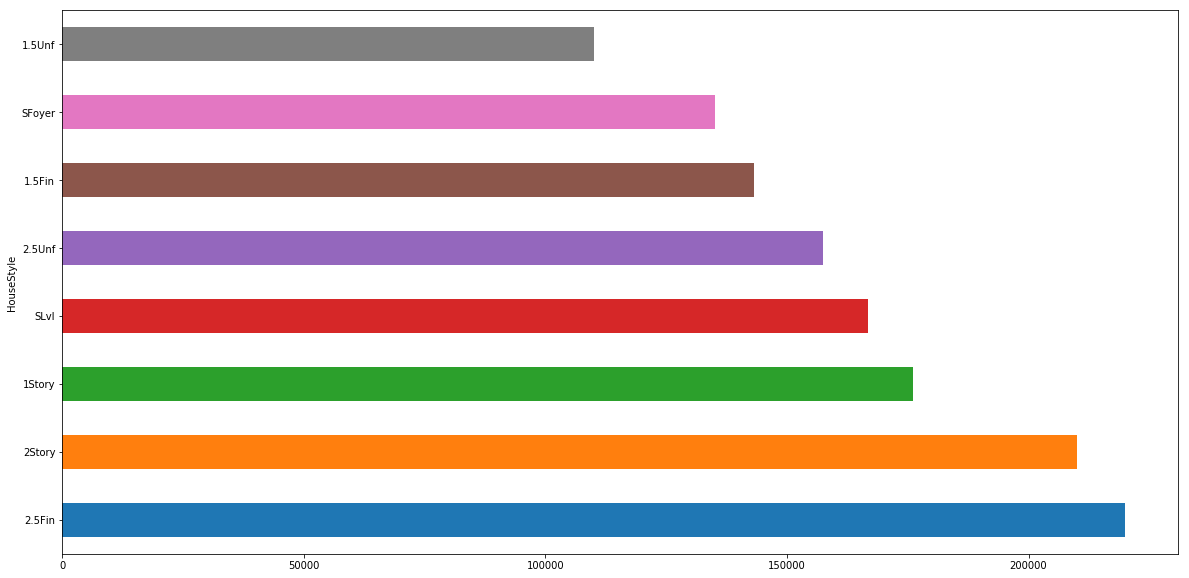

In [21]:
corr_salePrice(['HouseStyle'])

### Standardizing continuous columns - ?

In [22]:
# data.drop(['SalePrice'], axis = 1, inplace = True)